# SNLP 2021 Final Project

Name 1: Akash Kumar <br/>
Student id 1: 7009735 <br/>
Email 1: akku00001@stud.uni-saarland.de <br/>


Name 2: Lavanya Govindaraju <br/>
Student id 2: 7002430 <br/>
Email 2: lago00001@stud.uni-saarland.de<br/> 



In [1]:
! cd /home/snlp-project-21/Project

## 1. Data Preparation


In [8]:
from importlib import reload
import preprocess
import os
preprocess= reload(preprocess)

files= os.listdir('data/')
for i in files:
    #base = os.path.splitext(i)[0]
    #os.rename(i, base + '.txt')
    path= 'data/'+i
    file = open(path, encoding='utf-8')
    if i== 'alice_in_wonderland.txt':
        text = file.read()
        pp = preprocess.preprocess_english(text)
        train, test= preprocess.train_test_split_data(pp, 0.2)
        en_train = open("en_train.txt", "w")
        for element in train:
            en_train.write(element + "\n")
        en_train.close()
        en_test = open("en_test.txt", "w")
        for element in test:
            en_test.write(element + "\n")
        en_test.close()
        

### For Data Preprocessing, all the special characters, digits ,punctuations are removed ,and the corpora are split into sentences for both English and Bengali corpora. In addition, English alphabets are removed from Bengali corpus.

## 2. Subword Segmentation


### 2.2 (For English Lnaguage)

In [1]:
from importlib import reload
import subword
subword = reload(subword)
subword.trainer('en_train.txt', 1000, 1, folder= 'Model/English/')
subword.encode1(path='en_train.txt', folder= 'Model/English/',  model= 'Model/English/en_train_seg.model')
subword.decode(path= 'Model/English/en_train_seg.txt', folder= 'Model/English/', model= 'Model/English/en_train_seg.model')

### 2.3 Choosing different vocabulary size

In [96]:
# 1. Characters. This can be done manually but also by running BPE with the output vocabulary size being the same as the input alphabet size.

subword.trainer('en_train.txt', 30, 1, folder= 'Model/English/S1/')
subword.encode1(path='en_train.txt', folder= 'Model/English/S1/',  model= 'Model/English/S1/en_train_seg.model')
subword.decode(path= '/home/snlp-project-21/Project/Model/English/S1/en_train_seg.txt', folder= 'Model/English/S1', model= 'Model/English/S1/en_train_seg.model')

#test data
subword.trainer('en_test.txt', 30, 1, folder= 'Model/English/S1/')
subword.encode1(path='en_test.txt', folder= 'Model/English/S1/',  model= 'Model/English/S1/en_test_seg.model')


In [126]:
# 2. Subword Units: smaller vocabulary, closer to characters. The vocabulary size is usually in the range of 100 to 800 for English.

subword.trainer('en_train.txt',100, 1, folder= 'Model/English/S2/')
subword.encode1(path='en_train.txt', folder= 'Model/English/S2/',  model= 'Model/English/S2/en_train_seg.model')
subword.decode(path= '/home/snlp-project-21/Project/Model/English/S2/en_train_seg.txt', folder= 'Model/English/S2', model= 'Model/English/S2/en_train_seg.model')

#test data
subword.trainer('en_test.txt',100, 1, folder= 'Model/English/S2/')
subword.encode1(path='en_test.txt', folder= 'Model/English/S2/',  model= 'Model/English/S2/en_test_seg.model')

In [13]:
# 3. Subword Units: larger vocabulary, closer to words. The vocabulary size is usually in the range 1500 to 3000 for English.

subword.trainer('en_train.txt',3000, 1, folder= 'Model/English/S3/')
subword.encode1(path='en_train.txt', folder= 'Model/English/S3/',  model= 'Model/English/S3/en_train_seg.model')
subword.decode(path= '/home/snlp-project-21/Project/Model/English/S3/en_train_seg.txt', folder= 'Model/English/S3', model= 'Model/English/S3/en_train_seg.model')

#test data
subword.trainer('en_test.txt',3000, 1, folder= 'Model/English/S3/')
subword.encode1(path='en_test.txt', folder= 'Model/English/S3/',  model= 'Model/English/S3/en_test_seg.model')

### Here, subwords are formed using python API sentencepiece.

## For English Corpora
### 1. For the S1 model, we have chosen the vocabulary size same as the input alphabet size ie 30 in this case.
### 2. For the S2 model, we have chosen the vocabulary size of 100 that is near to the character level and we got the lowest perplexity and OOV rate.
### 3. For the S3 model, we have chosen the vocabulary size of 3000 that is near to the word level and we got the lowest perplexity and OOV rate.

### On observing the outputs of all the three above models, we can say that :
### 1. The S1 model is pure character-level, ie words are segmented as characters and there are no meaningful units.
### 2. The S2 model is near the character-level, the words with high frequency remain as it is whereas low frequency words are segmented into subwords.
### 3. The S3 model is near word-level, the words are segmented same as stemming. For example: nearly -> _near _ly

## For Bengali Corpora

### 1. For the S1 model, we have chosen the vocabulary size same as the input alphabet size ie 49 in this case.
### 2. For the S2 model, we have chosen the vocabulary size of 120 that is near to the character level and we got the lowest perplexity and OOV rate.
### 3. For the S3 model, we have chosen the vocabulary size of 1500 that is near to the word level and we got the lowest perplexity and OOV rate.


## 3. LM Training

In [103]:
# Training of S1 Model
! /home/snlp-project-21/rnnlm/rnnlm \
    -train /home/snlp-project-21/Project/Model/English/S1/en_train_seg.txt \
    -valid /home/snlp-project-21/Project/Model/English/S1/en_test_seg.txt \
    -rnnlm Model/English/S1/rnnlm/S1_model \
      -hidden 180 \
      -rand-seed 1 \
      -debug 2 \
      -bptt 5 \
      -class 20

debug mode: 2
train file: /home/snlp-project-21/Project/Model/English/S1/en_train_seg.txt
valid file: /home/snlp-project-21/Project/Model/English/S1/en_test_seg.txt
class size: 20
Hidden layer size: 180
BPTT: 5
Rand seed: 1
rnnlm file: Model/English/S1/rnnlm/S1_model
Starting training using file /home/snlp-project-21/Project/Model/English/S1/en_train_seg.txt
Vocab size: 28
Words in train file: 111179
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 2.8644    Words/sec: 14906.8   VALID entropy: 2.6597
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 2.4068    Words/sec: 15408.9   VALID entropy: 2.5070
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 2.2462    Words/sec: 15404.6   VALID entropy: 2.4251
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 2.1471    Words/sec: 15442.0   VALID entropy: 2.3779
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 2.0781    Words/sec: 15414.5   VALID entropy: 2.3366
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 2.0228    Words/sec: 15409.4   VALID entropy: 2.3108
Iter:   6	Alph

In [17]:
# Printing Perplexity
f= open('Model/English/S1/rnnlm/baseline_model.output.txt')
r= f.readlines()[39:]
print('Baseline Perplexity is',r)
f= open('Model/English/S1/rnnlm/S1_model.output.txt')
r= f.readlines()[55:]
print('Final Perplexity is',r)

Baseline Perplexity is ['PPL net: 5.120153\n']
Final Perplexity is ['PPL net: 4.191200\n']


In [135]:
# Training of S2 Model

! /home/snlp-project-21/rnnlm/rnnlm \
    -train /home/snlp-project-21/Project/Model/English/S2/en_train_seg.txt \
    -valid /home/snlp-project-21/Project/Model/English/S2/en_test_seg.txt \
    -rnnlm Model/English/S2/rnnlm/S2_model \
      -hidden 160\
      -rand-seed 1 \
      -debug 2 \
      -bptt 5\
      -class 80


debug mode: 2
train file: /home/snlp-project-21/Project/Model/English/S2/en_train_seg.txt
valid file: /home/snlp-project-21/Project/Model/English/S2/en_test_seg.txt
class size: 80
Hidden layer size: 160
BPTT: 5
Rand seed: 1
rnnlm file: Model/English/S2/rnnlm/S2_model
Starting training using file /home/snlp-project-21/Project/Model/English/S2/en_train_seg.txt
Vocab size: 98
Words in train file: 61726
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 5.2536    Words/sec: 13506.2   VALID entropy: 5.0903
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 4.3004    Words/sec: 13299.2   VALID entropy: 4.8711
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 4.0015    Words/sec: 13488.0   VALID entropy: 4.8031
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 3.8118    Words/sec: 13197.1   VALID entropy: 4.7708
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 3.6689    Words/sec: 13175.1   VALID entropy: 4.7580
Iter:   5	Alpha: 0.050000	   TRAIN entropy: 3.4725    Words/sec: 13292.2   VALID entropy: 4.6678
Iter:   6	Alpha

In [19]:
# Printing Perplexity
f= open('Model/English/S2/rnnlm/S2_baseline.output.txt')
r= f.readlines()[39:]
print('Baseline Perplexity is',r)
f= open('Model/English/S20/rnnlm/S2_model.output.txt')
r= f.readlines()[39:]
print('Final Perplexity is',r)

Baseline Perplexity is ['PPL net: 40.069914\n']
Final Perplexity is ['PPL net: 23.408588\n']


In [198]:
# Training of S3 Model

! /home/snlp-project-21/rnnlm/rnnlm \
    -train /home/snlp-project-21/Project/Model/English/S3/en_train_seg.txt \
    -valid /home/snlp-project-21/Project/Model/English/S3/en_test_seg.txt \
    -rnnlm Model/English/S3/rnnlm/S3_model\
      -hidden 60 \
      -rand-seed 1 \
      -debug 2 \
      -bptt 3 \
      -class 2000

debug mode: 2
train file: /home/snlp-project-21/Project/Model/English/S3/en_train_seg.txt
valid file: /home/snlp-project-21/Project/Model/English/S3/en_test_seg.txt
class size: 2000
Hidden layer size: 60
BPTT: 3
Rand seed: 1
rnnlm file: Model/English/S3/rnnlm/S3_model
Starting training using file /home/snlp-project-21/Project/Model/English/S3/en_train_seg.txt
Vocab size: 2378
Words in train file: 23743
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 8.7458    Words/sec: 5137.0   VALID entropy: 7.8870
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 8.3006    Words/sec: 5079.0   VALID entropy: 7.5534
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 7.9313    Words/sec: 5294.9   VALID entropy: 7.3581
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 7.6646    Words/sec: 5003.4   VALID entropy: 7.2407
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 7.4552    Words/sec: 5097.6   VALID entropy: 7.1651
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 7.2726    Words/sec: 5210.7   VALID entropy: 7.1193
Iter:   6	Alpha: 0

In [20]:
# Printing Perplexity

f= open('Model/English/S3/rnnlm/S3_baseline.output.txt')
r= f.readlines()[51:]
print('Baseline Perplexity is',r)
f= open('Model/English/S3/rnnlm/S3_model.output.txt')
r= f.readlines()[47:]
print('Final Perplexity is',r)

Baseline Perplexity is ['PPL net: 123.147581\n']
Final Perplexity is ['PPL net: 120.968428\n']


## 4.Text Generation

In [157]:
# Text Generation for S1 Model

for i in range(1,8):
    a= 10**i
    b= str(a)+'.txt'
    ! /home/snlp-project-21/rnnlm/rnnlm \
        -rnnlm /home/snlp-project-21/Project/Model/English/S1/rnnlm/S1_model \
            -gen $a \
                - debug 0 > /home/snlp-project-21/Project/Model/English/S1/rnnlm/$b


In [158]:
# Text Generation for S2 Model

for i in range(1,8):
    a= 10**i
    b= str(a)+'.txt'
    ! /home/snlp-project-21/rnnlm/rnnlm \
        -rnnlm /home/snlp-project-21/Project/Model/English/S2/rnnlm/S2_model \
            -gen $a \
                - debug 0 > /home/snlp-project-21/Project/Model/English/S2/rnnlm/$b


In [159]:
# Text Generation for S3 Model

for i in range(1,8):
    a= 10**i
    b= str(a)+'.txt'
    ! /home/snlp-project-21/rnnlm/rnnlm \
        -rnnlm /home/snlp-project-21/Project/Model/English/S3/rnnlm/S3_model \
            -gen $a \
                - debug 0 > /home/snlp-project-21/Project/Model/English/S3/rnnlm/$b


In [163]:
# Decoding 100.txt for every model 

# For S1 model

subword.decode(path= '/home/snlp-project-21/Project/Model/English/S1/rnnlm/100.txt', folder= 'Model/English/S1/rnnlm', model= 'Model/English/S1/en_train_seg.model')

# For S2 model

subword.decode(path= '/home/snlp-project-21/Project/Model/English/S2/rnnlm/100.txt', folder= 'Model/English/S2/rnnlm', model= 'Model/English/S2/en_train_seg.model')

# For S3 model

subword.decode(path= '/home/snlp-project-21/Project/Model/English/S3/rnnlm/100.txt', folder= 'Model/English/S3/rnnlm', model= 'Model/English/S3/en_train_seg.model')


## Observation of 100.txt for every model

### The quality of the generated data for S1 model is better than S2 and S3 model is better than both S1 and S2. The reason for this observation could be that S3 model has most meaningful units after subword segmentation, S1 model is character level, so model is trained on the characters which in turn generating some meaningful units. But in the S2 model, the subwords are for most of the infrequent words, so basically model is trained on very less meaningful units which in turn producing the least quality text.




## 5. OVV Comparision

In [2]:
# 1. For Original Corpora
from importlib import reload
import oov
oov = reload(oov)

t=[]
# Train Corpora
f1= open('Model/English/en_train_seg_org.txt')
fr1= f1.read()
train= fr1.split()

# Test Corpora
f2= open('Model/English/en_test_seg_org.txt')
fr2= f2.read()
test= fr2.split()

oov_rate= oov.get_oov_rates(train, test)
print(oov_rate)

0.05911016949152542


{'10_org.txt': 0.05911016949152542, '100_org.txt': 0.05911016949152542, '1000_org.txt': 0.05911016949152542, '10000_org.txt': 0.05847457627118644, '100000_org.txt': 0.05572033898305085, '1000000_org.txt': 0.048305084745762714, '10000000_org.txt': 0.03940677966101695}


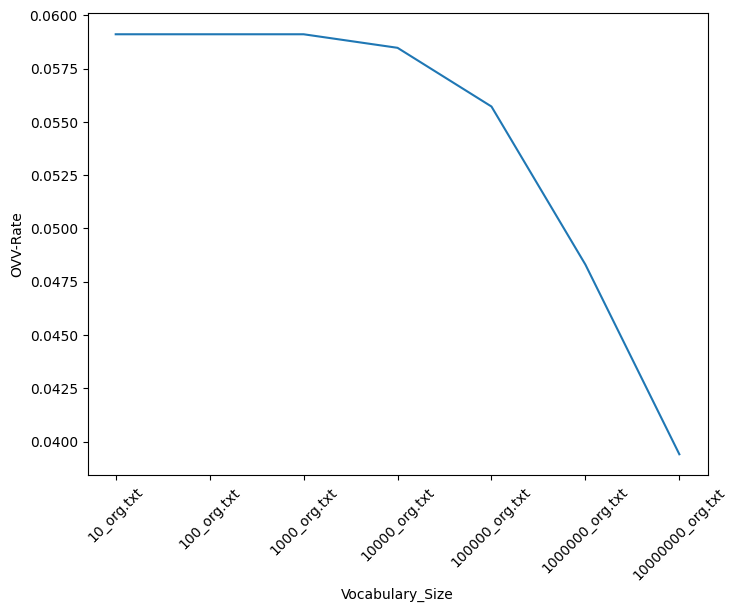

In [24]:
# 2. For S1 Model
oov_s1={}
for i in range(1,8):
    subword.decode(path= '/home/snlp-project-21/Project/Model/English/S1/rnnlm/{}.txt'.format(10**i), folder= 'Model/English/S1/rnnlm', model= 'Model/English/S1/en_train_seg.model')
    f= open('Model/English/S1/rnnlm/{}_org.txt'.format(10**i))
    r= f.readlines()[2:]
    l= [words for segments in r for words in segments.split()]
    tr= l+train
    oov_rate= oov.get_oov_rates(tr, test)
    oov_s1['{}_org.txt'.format(10**i)]= oov_rate


print(oov_s1)

# Plotting OOV Rates
oov.plot_oov_rates(oov_s1)




{'10_org.txt': 0.05911016949152542, '100_org.txt': 0.05911016949152542, '1000_org.txt': 0.05911016949152542, '10000_org.txt': 0.057838983050847455, '100000_org.txt': 0.055508474576271186, '1000000_org.txt': 0.04766949152542373, '10000000_org.txt': 0.03686440677966102}


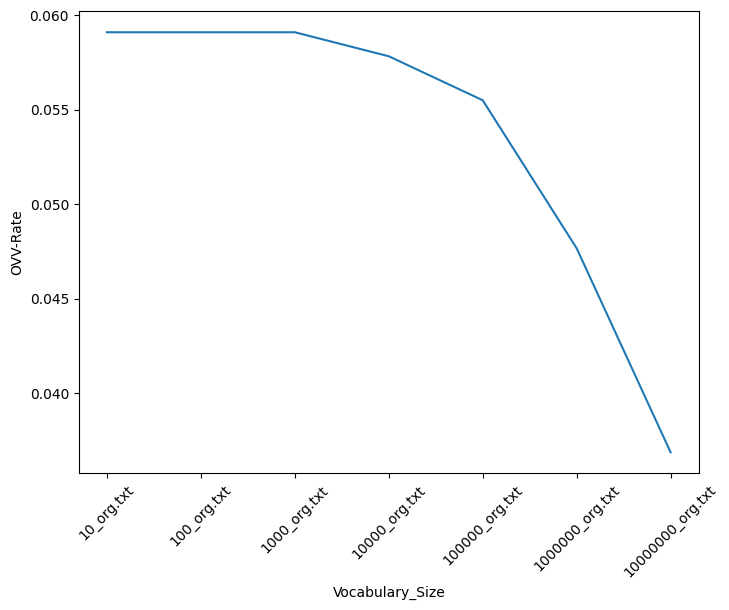

In [25]:
# 2. For S2 Model
oov_s2={}
for i in range(1,8):
    subword.decode(path= '/home/snlp-project-21/Project/Model/English/S2/rnnlm/{}.txt'.format(10**i), folder= 'Model/English/S2/rnnlm', model= 'Model/English/S2/en_train_seg.model')
    f= open('Model/English/S2/rnnlm/{}_org.txt'.format(10**i))
    r= f.readlines()[2:]
    l= [words for segments in r for words in segments.split()]
    tr= l+train
    oov_rate= oov.get_oov_rates(tr, test)
    oov_s2['{}_org.txt'.format(10**i)]= oov_rate

print(oov_s2)

# Plotting OOV Rates
oov.plot_oov_rates(oov_s2)


{'10_org.txt': 0.05911016949152542, '100_org.txt': 0.05911016949152542, '1000_org.txt': 0.05911016949152542, '10000_org.txt': 0.0586864406779661, '100000_org.txt': 0.057203389830508475, '1000000_org.txt': 0.05423728813559322, '10000000_org.txt': 0.0451271186440678}


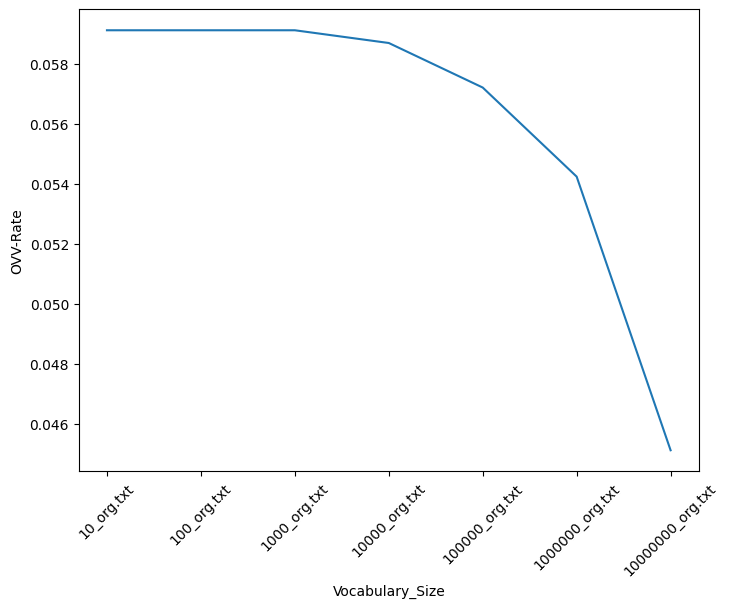

In [3]:
# 3. For S3 Model
oov_s3={}
for i in range(1,8):
    subword.decode(path= '/home/snlp-project-21/Project/Model/English/S3/rnnlm/{}.txt'.format(10**i), folder= 'Model/English/S3/rnnlm', model= 'Model/English/S3/en_train_seg.model')
    f= open('Model/English/S3/rnnlm/{}_org.txt'.format(10**i))
    r= f.readlines()[2:]
    l= [words for segments in r for words in segments.split()]
    tr= l+train
    oov_rate= oov.get_oov_rates(tr, test)
    oov_s3['{}_org.txt'.format(10**i)]= oov_rate

print(oov_s3)

# Plotting OOV Rates
oov.plot_oov_rates(oov_s3)


## Observation

As we can see that ovv rate is decreasing on increasing the vocabulary size. The final oov rate for S1 model is 0.039, for S2 model is 0.036, and for S3 it is 0.045. Since the  model S2 has lowest oov rate so, its better to use that model in practical application. 

## 6. Analysis

### This project is about subword segmentation for handing the oov rates of the two language English and Bengali. We aimed to achive the lowest perplexity rate and oov rate. The oov rate for Bengali is more when comapred to English since Bengali is morphologically rich langauge. For task 1, we have choosen vocabulary size of 30, 100 and 3000 for English Model S1, S2 and S3 respectively. For Bangali language we have choseen vocabulary size of 49, 120 and 1500 for model S1, S2 and S3 respectively. We have choosen these values by comparing perplexity values and oov rates, i.e. for these values the perplexity and oov rates of models are lowest. We have choosen hyper parameeters such as vocabulary size, no of hidden layers, bpt and class size to tune models to achieve better results. Below are the hyper-parameters values for each model of both the langauges:

### For English:
### Model S1: Hidden Layers: 180, bpt: 5 and class: 20
### Model S2: Hidden Layers: 160, bpt: 5 and class: 80
### Model S3: Hidden Layers: 60, bpt: 3 and class: 2000

### For Bengali:
### Model S1: Hidden Layers: 200, bpt: 5 and class: 231
### Model S2: Hidden Layers: 250, bpt: 5 and class: 290
### Model S3: Hidden Layers: 180, bpt: 5 and class: 1600

### On inspecting 100.txt for every model, the quality of the generated data for S1 model is better than S2 and S3 model is better than both S1 and S2. The reason for this observation could be that S3 model has most meaningful units after subword segmentation, S1 model is character level, so model is trained on the characters which in turn generating some meaningful units. But in the S2 model, the subwords are for most of the infrequent words, so basically model is trained on very less meaningful units which in turn producing the least quality text.

### The OOV rate for English language is lesser than the Bangali as the vocabulary size of English is less then the Bengali. For English, we achieved the oov rate on origonal corpora as 6 % which got reduced to 3.9 % for S1 Model, 3.6 % for S2 Model, and 4.5 % for S3 model. 
### For Bengali, we achieved the oov rate on origonal corpora as 12 % which got reduced to 9.5 % for S1 Model, 9.3 % for S2 Model, and 9.6 % for S3 model
### As there is no proper way to find the best parameters for the model, so there are some values for which the results could be improved like by increasing/decreasing the vocabulary size, no. of hidden layers, bpt value and class size.

### This project helped us to understand the implementation of subword segmentation and how it influced the oov rates and perplexity of the model.
